<img src="Programming%20Tutorials(Title).png" style="height:600px", align="middle">

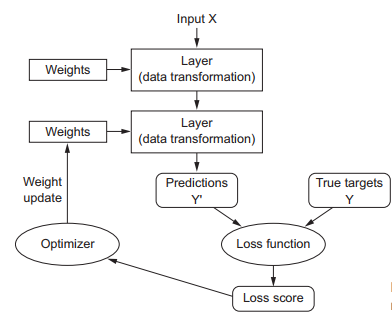

In [1]:
from keras import layers
layer = layers.Dense(32, input_shape=(784,))

f:\win7\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

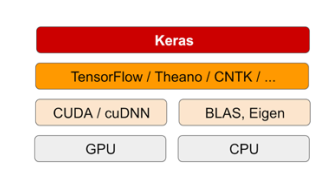

In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))
#And here’s the same model defined using the functional API:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

f:\win7\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
        loss='mse',
        metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [12]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [13]:
train_labels[0]

1

In [14]:
max([max(sequence) for sequence in train_data])

9999

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
        [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

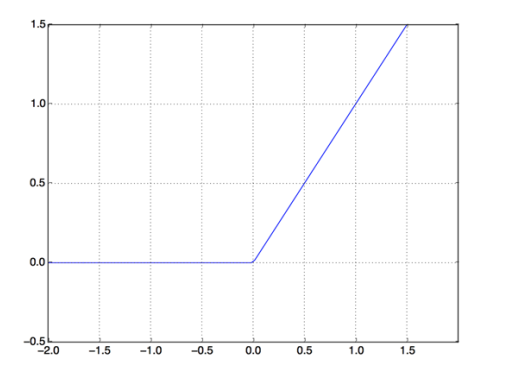

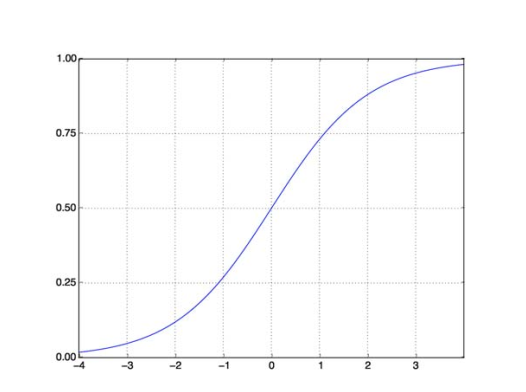

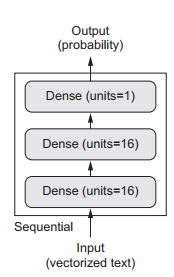

In [19]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
#Compiling the model
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [21]:
#Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [22]:
#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
#Training your model
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 36s 2ms/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 5s 318us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 5s 318us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 5s 318us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 5s 316us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 5s 319us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 5s 323us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - v

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [26]:
history_dict.values()

dict_values([[0.37968396944999694, 0.30037296371459959, 0.30853163027763364, 0.28397780170440673, 0.28414868884086608, 0.31658622026443484, 0.31267625660896303, 0.38590703973770141, 0.36349444065093994, 0.38425205645561217, 0.41528340492248533, 0.45254451022148134, 0.46981495170593263, 0.50229982151985164, 0.53417152061462403, 0.57096672935485837, 0.60245705480575562, 0.67820998926162723, 0.66925640325546265, 0.69415715141296386], [0.8683999997138977, 0.88970000047683717, 0.87110000009536748, 0.88320000019073486, 0.88720000028610224, 0.87719999980926511, 0.88459999990463256, 0.86489999971389775, 0.87820000019073485, 0.87920000019073485, 0.87789999990463252, 0.86899999980926512, 0.87289999971389776, 0.8725999996185303, 0.86929999990463258, 0.86979999961853027, 0.86969999971389766, 0.86329999952316283, 0.86739999942779544, 0.86579999961853027], [0.5084239921410878, 0.30042938413619996, 0.21790880769093832, 0.1750444632768631, 0.14269257117907205, 0.11499823479652405, 0.098004445616404215

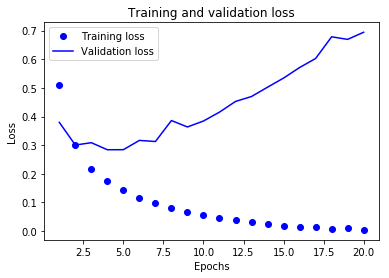

In [27]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

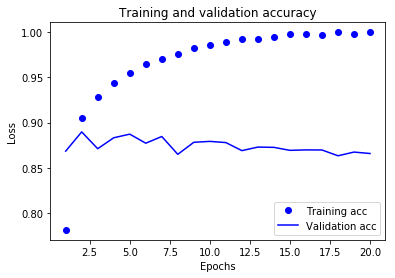

In [29]:
#Plotting the training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
#Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 215us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 5s 201us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 5s 201us/step - loss: 0.1987 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 7s 276us/step


In [37]:
results

[0.3112932764434814, 0.87636]

In [31]:
model.predict(x_test)

array([[ 0.1356007 ],
       [ 0.99971181],
       [ 0.27816328],
       ..., 
       [ 0.07139966],
       [ 0.04283792],
       [ 0.47383896]], dtype=float32)

------------------------------------------------------------------------------------------------------

In [39]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 17s 8us/step


In [42]:
len(train_data)

8982

In [40]:
len(test_data)

2246

In [41]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [43]:
#Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 5s 9us/step


In [44]:
train_labels[10]

3

In [46]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [48]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [49]:
# Note that there is a built-in way to do this in Keras, which you’ve already seen in action
# in the MNIST example:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [50]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [51]:
model.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [52]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [53]:
history = model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 206us/step - loss: 2.5237 - acc: 0.4987 - val_loss: 1.7171 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.4430 - acc: 0.6891 - val_loss: 1.3503 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 146us/step - loss: 1.0983 - acc: 0.7645 - val_loss: 1.1756 - val_acc: 0.7400
Epoch 4/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.8725 - acc: 0.8167 - val_loss: 1.0814 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.7060 - acc: 0.8485 - val_loss: 0.9881 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.5694 - acc: 0.8796 - val_loss: 0.9416 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.4627 - acc: 0.9034 - val_loss: 0.9091 - val_acc: 0.8000


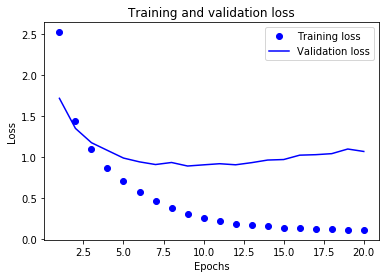

In [54]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

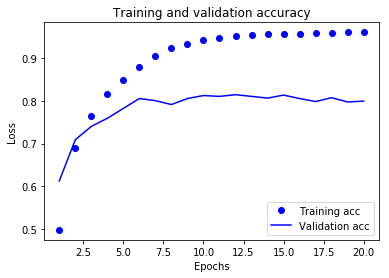

In [55]:
#Plotting the training and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
#Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 176us/step - loss: 2.5401 - acc: 0.5226 - val_loss: 1.6792 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s 147us/step - loss: 1.3785 - acc: 0.7096 - val_loss: 1.2825 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 154us/step - loss: 1.0207 - acc: 0.7781 - val_loss: 1.1321 - val_acc: 0.7550
Epoch 4/9
7982/7982 [==============================] - 1s 150us/step - loss: 0.8003 - acc: 0.8257 - val_loss: 1.0532 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 1s 150us/step - loss: 0.6392 - acc: 0.8629 - val_loss: 0.9753 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.5112 - acc: 0.8930 - val_loss: 0.9097 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 150us/step - loss: 0.4114 - acc: 0.9142 - val_loss: 0.8914 - val_acc: 0.8240
Epoch 8

In [58]:
results

[1.0224401250229493, 0.7778272484947504]

In [59]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [60]:
predictions = model.predict(x_test)

In [61]:
predictions[0].shape

(46,)

In [62]:
np.sum(predictions[0])

0.99999976

In [63]:
np.argmax(predictions[0])

3

In [64]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [65]:
model.compile(optimizer='rmsprop',
        loss='sparse_categorical_crossentropy',
        metrics=['acc'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [67]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
model.fit(partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=128,
        validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 229us/step - loss: 2.6597 - acc: 0.3765 - val_loss: 1.9703 - val_acc: 0.5290
Epoch 2/20
7982/7982 [==============================] - 2s 198us/step - loss: 1.6678 - acc: 0.6205 - val_loss: 1.5415 - val_acc: 0.6230
Epoch 3/20
7982/7982 [==============================] - 2s 205us/step - loss: 1.3345 - acc: 0.6681 - val_loss: 1.3956 - val_acc: 0.6790
Epoch 4/20
7982/7982 [==============================] - 2s 198us/step - loss: 1.1436 - acc: 0.7271 - val_loss: 1.3214 - val_acc: 0.6970
Epoch 5/20
7982/7982 [==============================] - 2s 200us/step - loss: 1.0114 - acc: 0.7463 - val_loss: 1.2662 - val_acc: 0.7050
Epoch 6/20
7982/7982 [==============================] - 2s 202us/step - loss: 0.9098 - acc: 0.7585 - val_loss: 1.2758 - val_acc: 0.7080
Epoch 7/20
7982/7982 [==============================] - ETA: 0s - loss: 0.8314 - acc: 0.774 - 2s 201us/step - loss: 0.8295 - acc: 0.7746

------------------------------------------------------------------------------------------------------

In [32]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

In [33]:
train_data.shape

(404, 13)

In [34]:
test_data.shape

(102, 13)

In [35]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [36]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [37]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [38]:
all_scores

[2.0581326413862775,
 2.2001309324019025,
 2.8750618802438868,
 2.4107751574846779]

In [39]:
np.mean(all_scores)

2.3860251528791858

In [74]:
#Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [77]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

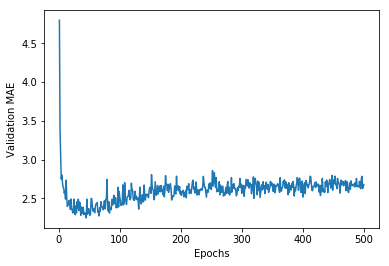

In [78]:
#Plotting validation scores
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

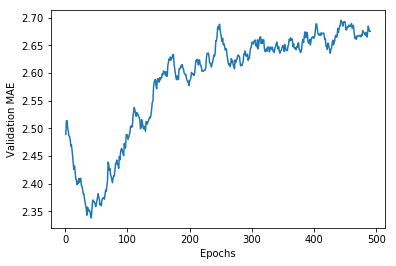

In [79]:
#Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [80]:
model = build_model()
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [81]:
test_mae_score

2.683789758121266

In [82]:
#Original model
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [83]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu', 
                       input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
layer_output /= 0.5

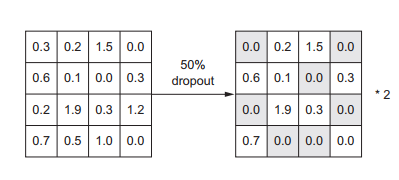

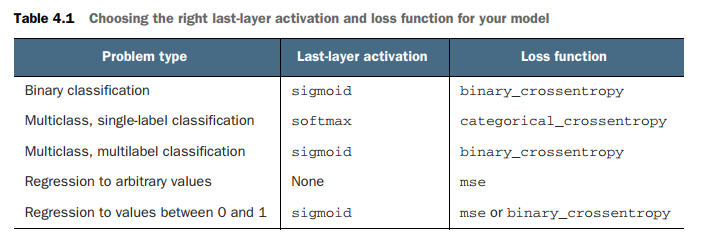

<img src="Programming%20Tutorials%20End.png" style="height:600px", align="middle">